DESCRIPTION

Background of Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

Import a 311 NYC service request.
Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?

In [1]:
import pandas as pd
import numpy as np

In [2]:
CSRA_Data = pd.read_csv(r"C:\Users\adity\Documents\311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
CSRA_Data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
CSRA_Data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
CSRA_Data.shape

(300698, 53)

In [6]:
CSRA_Data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [7]:
CSRA_Data = CSRA_Data[pd.notnull(CSRA_Data['Closed Date'])]

In [8]:
CSRA_Data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                            0
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5909
Location Type                        128
Incident Zip                         507
Incident Address                   44397
Street Name                        44397
Cross Street 1                     47563
Cross Street 2                     47653
Intersection Street 1             255094
Intersection Street 2             255180
Address Type                         707
City                                 506
Landmark                          298185
Facility Type                         15
Status                                 0
Due Date                               1
Resolution Description                 0
Resolution Action Updated Date        39
Community Board                        0
Borough         

In [9]:
CSRA_Data[['Created Date','Closed Date']]

,Created Date,Closed Date
0,12/31/2015 11:59:45 PM,01-01-16 0:55
1,12/31/2015 11:59:44 PM,01-01-16 1:26
2,12/31/2015 11:59:29 PM,01-01-16 4:51
3,12/31/2015 11:57:46 PM,01-01-16 7:43
4,12/31/2015 11:56:58 PM,01-01-16 3:24
...,...,...
300692,03/29/2015 12:34:32 AM,03/29/2015 01:13:01 AM
300694,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM
300695,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM
300696,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM


In [10]:
CSRA_Data['Created Date'] = CSRA_Data['Created Date'].astype('datetime64[ns]')
CSRA_Data['Closed Date'] = CSRA_Data['Closed Date'].astype('datetime64[ns]')
CSRA_Data[['Created Date','Closed Date']]

,Created Date,Closed Date
0,2015-12-31 23:59:45,2016-01-01 00:55:00
1,2015-12-31 23:59:44,2016-01-01 01:26:00
2,2015-12-31 23:59:29,2016-01-01 04:51:00
3,2015-12-31 23:57:46,2016-01-01 07:43:00
4,2015-12-31 23:56:58,2016-01-01 03:24:00
...,...,...
300692,2015-03-29 00:34:32,2015-03-29 01:13:01
300694,2015-03-29 00:33:28,2015-03-29 02:33:59
300695,2015-03-29 00:33:03,2015-03-29 03:40:20
300696,2015-03-29 00:33:02,2015-03-29 04:38:35


In [11]:
CSRA_Data['Request_Closing_Time']=CSRA_Data['Closed Date']-CSRA_Data['Created Date']
CSRA_Data['Request_Closing_Time']

0        00:55:15
1        01:26:16
2        04:51:31
3        07:45:14
4        03:27:02
           ...   
300692   00:38:29
300694   02:00:31
300695   03:07:17
300696   04:05:33
300697   04:08:49
Name: Request_Closing_Time, Length: 298534, dtype: timedelta64[ns]

In [12]:
#Num of Complaints closed after Due Date
CSRA_Data['Due Date'] = CSRA_Data['Due Date'].astype('datetime64[ns]')
over_time = CSRA_Data[CSRA_Data['Due Date']<CSRA_Data['Closed Date']]['Unique Key'].count()
less_time = CSRA_Data[CSRA_Data['Due Date']>CSRA_Data['Closed Date']]['Unique Key'].count()
same_time = CSRA_Data[CSRA_Data['Due Date']==CSRA_Data['Closed Date']]['Unique Key'].count()
not_closed = CSRA_Data['Closed Date'].isnull().sum()
times = np.array([over_time,less_time,same_time,not_closed])
names = np.array(['over_time','less_time','same_time','not_closed'])
times = pd.Series(times)
names = pd.Series(names)
df = pd.DataFrame({'time_taken':names, 'time':times})
df

,time_taken,time
0,over_time,38580
1,less_time,259892
2,same_time,61
3,not_closed,0


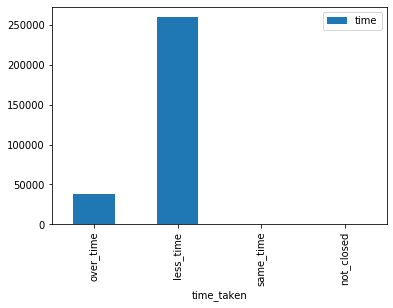

In [13]:
df.plot(kind='bar',x='time_taken')

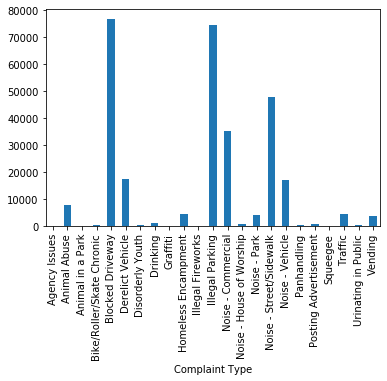

In [14]:
CSRA_Data.groupby('Complaint Type')['Unique Key'].count().plot(kind='bar')

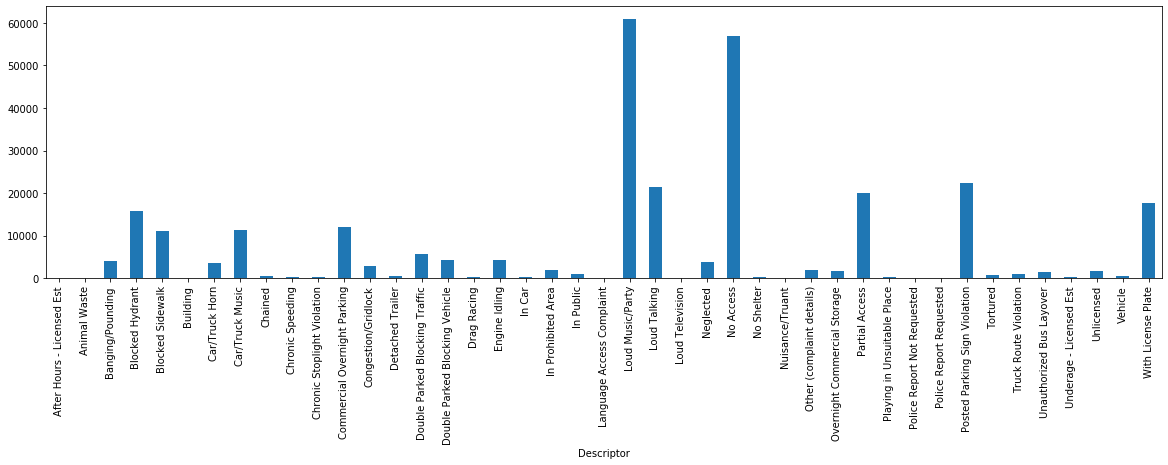

In [15]:
CSRA_Data.groupby('Descriptor')['Unique Key'].count().plot(kind='bar',figsize=[20,5])

In [16]:
CSRA_Data.groupby('Status')['Status'].agg('count')

Status
Assigned        26
Closed      298471
Draft            1
Open            36
Name: Status, dtype: int64

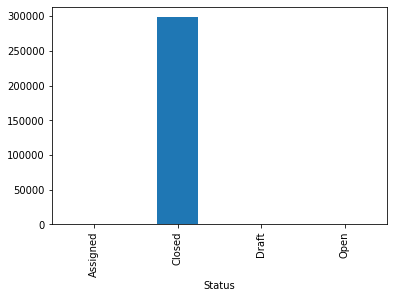

In [17]:
CSRA_Data.groupby('Status')['Status'].agg('count').plot(kind='bar')

In [18]:
CSRA_Data.groupby('Location Type')['Unique Key'].count()

Location Type
Bridge                             2
Club/Bar/Restaurant            17227
Commercial                        62
Highway                          214
House and Store                   93
House of Worship                 927
Park                               1
Park/Playground                 4751
Parking Lot                      117
Residential Building             227
Residential Building/House      6953
Roadway Tunnel                    35
Store/Commercial               20183
Street/Sidewalk               247503
Subway Station                    34
Vacant Lot                        77
Name: Unique Key, dtype: int64

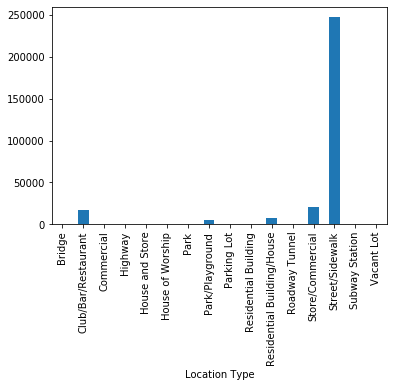

In [19]:
CSRA_Data.groupby('Location Type')['Unique Key'].count().plot(kind='bar')

In [20]:
import qgrid
qgrid_widget = qgrid.show_grid(CSRA_Data[['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type','Location Type']],show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [21]:
#convert Request_Closing_Time to mins
CSRA_Data['Request_Closing_Time'] = CSRA_Data['Request_Closing_Time'].astype('timedelta64[m]')

In [22]:
CSRA_Data['Request_Closing_Time']

0          55.0
1          86.0
2         291.0
3         465.0
4         207.0
          ...  
300692     38.0
300694    120.0
300695    187.0
300696    245.0
300697    248.0
Name: Request_Closing_Time, Length: 298534, dtype: float64

In [23]:
CSRA_Data.groupby('Location Type')['Request_Closing_Time'].agg('mean').sort_values()

Location Type
Subway Station                  141.970588
Club/Bar/Restaurant             185.769954
House of Worship                191.523193
Store/Commercial                197.783035
Park/Playground                 206.836876
Highway                         223.074766
Bridge                          229.000000
Roadway Tunnel                  266.085714
Street/Sidewalk                 268.211355
Residential Building            288.775330
House and Store                 300.462366
Residential Building/House      309.203222
Parking Lot                     319.863248
Commercial                      320.193548
Vacant Lot                      448.103896
Park                          20210.000000
Name: Request_Closing_Time, dtype: float64

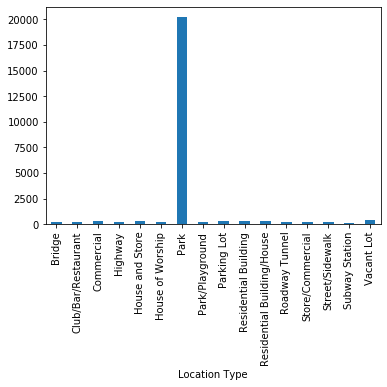

In [24]:
CSRA_Data.groupby('Location Type')['Request_Closing_Time'].agg('mean').plot(kind='bar')

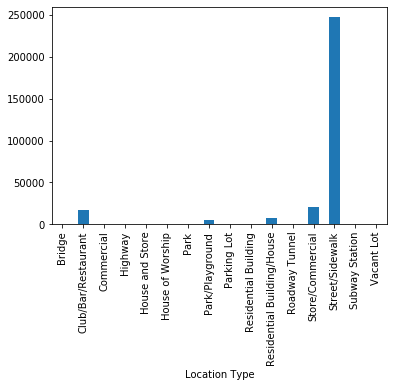

In [25]:
CSRA_Data.groupby('Location Type')['Request_Closing_Time'].agg('count').plot(kind='bar')

# Complaint Type and Reuest_Closing_Time are not related
# Complaint Type and Request_Closing_Time are related

In [26]:
CSRA_Data.groupby('Complaint Type')['Request_Closing_Time'].agg('mean')

Complaint Type
Agency Issues                  315.333333
Animal Abuse                   312.489830
Animal in a Park             20210.000000
Bike/Roller/Skate Chronic      225.693396
Blocked Driveway               284.148041
Derelict Vehicle               441.542756
Disorderly Youth               213.167832
Drinking                       231.391373
Graffiti                       428.752212
Homeless Encampment            261.637908
Illegal Fireworks              165.470238
Illegal Parking                269.762894
Noise - Commercial             188.524272
Noise - House of Worship       191.287406
Noise - Park                   204.343859
Noise - Street/Sidewalk        206.415509
Noise - Vehicle                215.038220
Panhandling                    262.072131
Posting Advertisement          118.251543
Squeegee                       242.500000
Traffic                        206.614991
Urinating in Public            217.302365
Vending                        240.524901
Name: Request_Closi

In [32]:
df = CSRA_Data[['Complaint Type', 'Request_Closing_Time']].sort_values(by='Complaint Type').reset_index().drop('index',axis=1)
df.columns = ['Complaint_Type','Request_Closing_Time']
df

,Complaint_Type,Request_Closing_Time
0,Agency Issues,411.0
1,Agency Issues,67.0
2,Agency Issues,623.0
3,Agency Issues,452.0
4,Agency Issues,162.0
...,...,...
298529,Vending,10.0
298530,Vending,49.0
298531,Vending,42.0
298532,Vending,79.0


In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('Request_Closing_Time ~ Complaint_Type',data=df).fit()
table = sm.stats.anova_lm(lm)
print(table)

                      df        sum_sq       mean_sq           F  PR(>F)
Complaint_Type      22.0  1.455002e+09  6.613647e+07  514.171756     0.0
Residual        298511.0  3.839663e+10  1.286272e+05         NaN     NaN


since p-value is 0 which is less than 0.05 , we fail to reject noll hypothesis, hence we conclude that avg request_closing_time across complaint types are related.

# Ho = Complaint Type and Location Type are not related.
# H1 = Complaint Type and Location Type are related.

In [34]:
df1 = CSRA_Data[pd.notnull(CSRA_Data['Location Type'])]
df2 = df1[['Complaint Type', 'Location Type']].sort_values(by='Complaint Type').reset_index().drop('index',axis=1)
df2

,Complaint Type,Location Type
0,Animal Abuse,Residential Building/House
1,Animal Abuse,Residential Building
2,Animal Abuse,Residential Building/House
3,Animal Abuse,Residential Building/House
4,Animal Abuse,Street/Sidewalk
...,...,...
298401,Vending,Store/Commercial
298402,Vending,Street/Sidewalk
298403,Vending,Street/Sidewalk
298404,Vending,Street/Sidewalk


In [35]:
data_crosstab = pd.crosstab(df2['Complaint Type'], df2['Location Type'], margins = False)
from scipy.stats import chi2_contingency
g,p,dof,expctd = chi2_contingency(data_crosstab)
g,p

(1328207.967082067, 0.0)

p-value is 0 which is less than 0.05 hence we fail to reject null hypothesis, and conclude that complaint type and location type are related.